# Tree-based methods
We will develop tree-based models from a dataset of liver patients in India

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Put the data in a data frame called `df`

In [2]:
df = pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
print("Number with liver disease = ",sum(df.Dataset==1))
print("Number without liver disease = ",sum(df.Dataset==2))

Number with liver disease =  416
Number without liver disease =  167


The column `Dataset` is the target; 1 means they need further diagnosis, and 2 means they don't.  Notice that there is a column `Gender`, which is not numerical.  So we replace `Male` with 1 and `Female` with 2.

In [4]:
df.Gender[df.Gender == "Male"] = 1
df.Gender[df.Gender =="Female"] = 2
df.head()

/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_79780/1732298499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == "Male"] = 1
/var/folders/6j/7jm_zl2s68l8kwj3mlfx8h6m0000gn/T/ipykernel_79780/1732298499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender =="Female"] = 2


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Set up training: let `X` be the feature variables and `y` be the target variables
Do the usual train-test split

In [5]:
X = df.iloc[:, :9]
y = df.Dataset
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)

Train a decision tree; evaluate `metrics.accuracy_score` and produce the `confusion_matrix`

In [6]:
tree = DecisionTreeClassifier().fit(xtrain,ytrain)

In [7]:
ypred = tree.predict(xtest)
accuracy = metrics.accuracy_score(ytest, ypred)
accuracy

0.6

Make a graph of the decision tree

In [8]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\santo002\Anaconda3\Library\bin\graphviz'

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin']


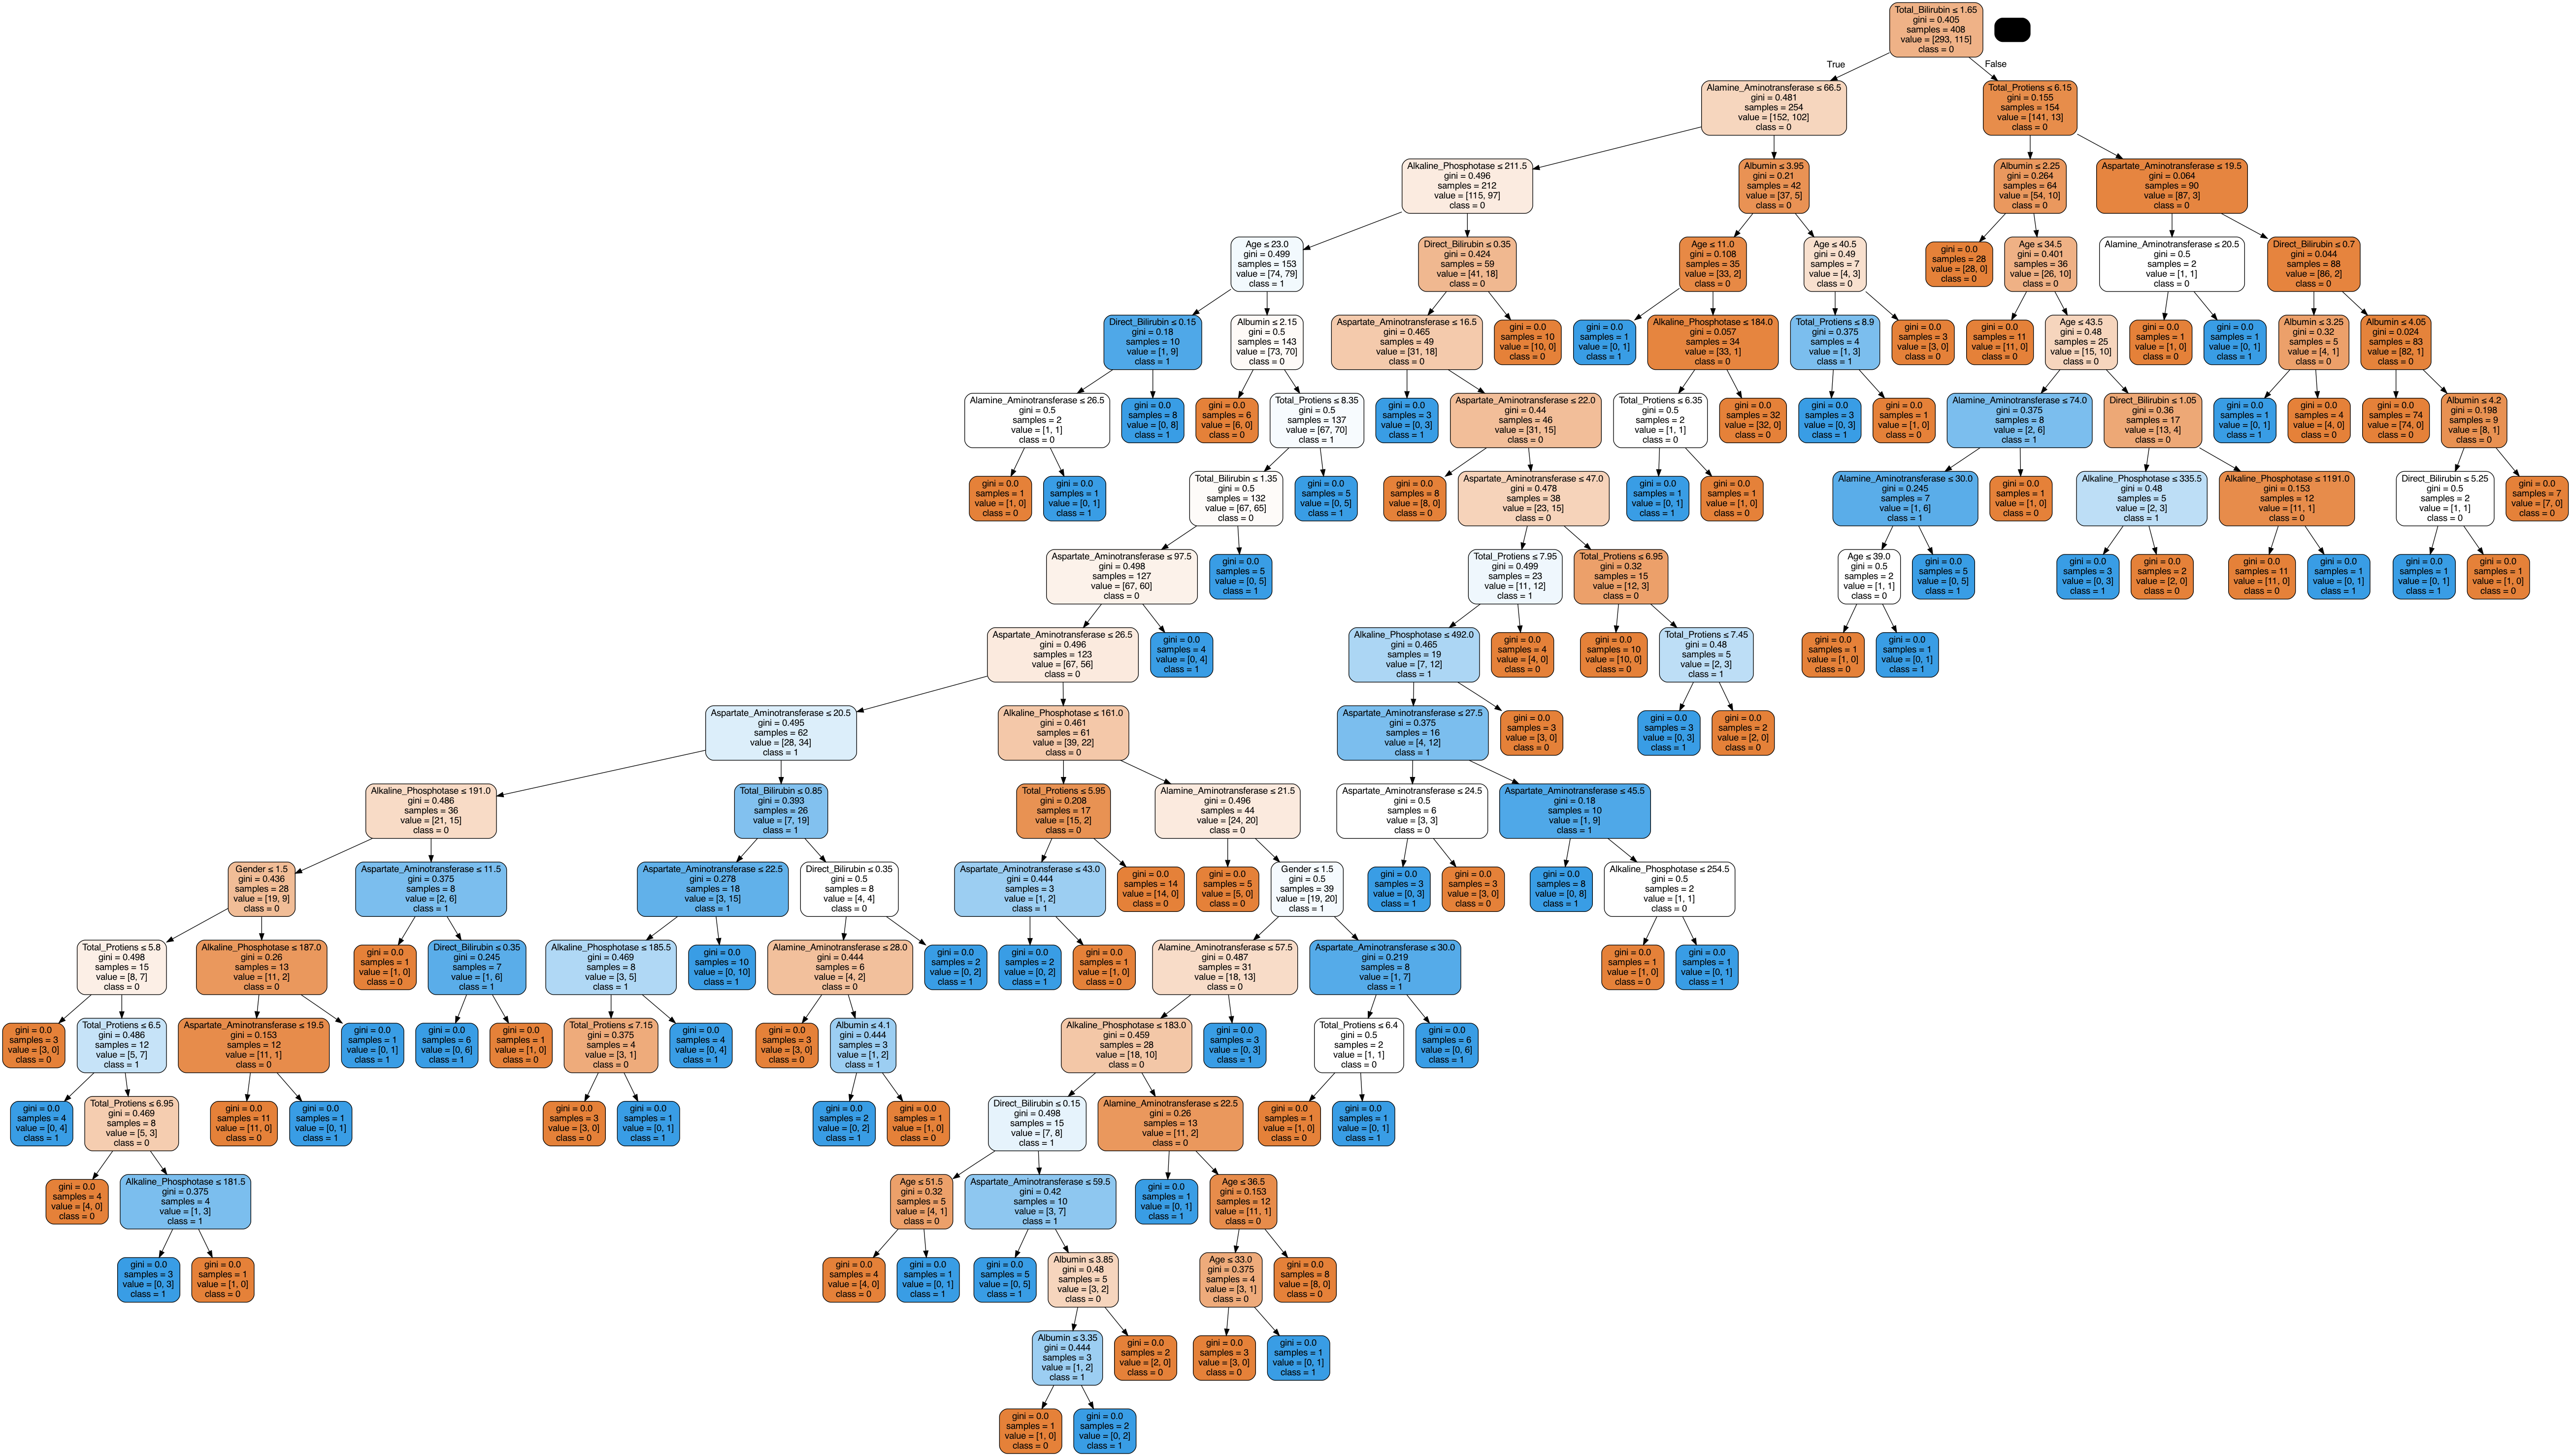

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = list(df)[0:9]
print(feature_cols)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver-disease.png')
Image(graph.create_png())

Reduce the tree depth to 4 and redo the exercise.

In [11]:
tree = DecisionTreeClassifier(max_depth = 4).fit(xtrain,ytrain)

In [12]:
ypred = tree.predict(xtest)
accuracy = metrics.accuracy_score(ytest, ypred)
accuracy

0.72

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin']


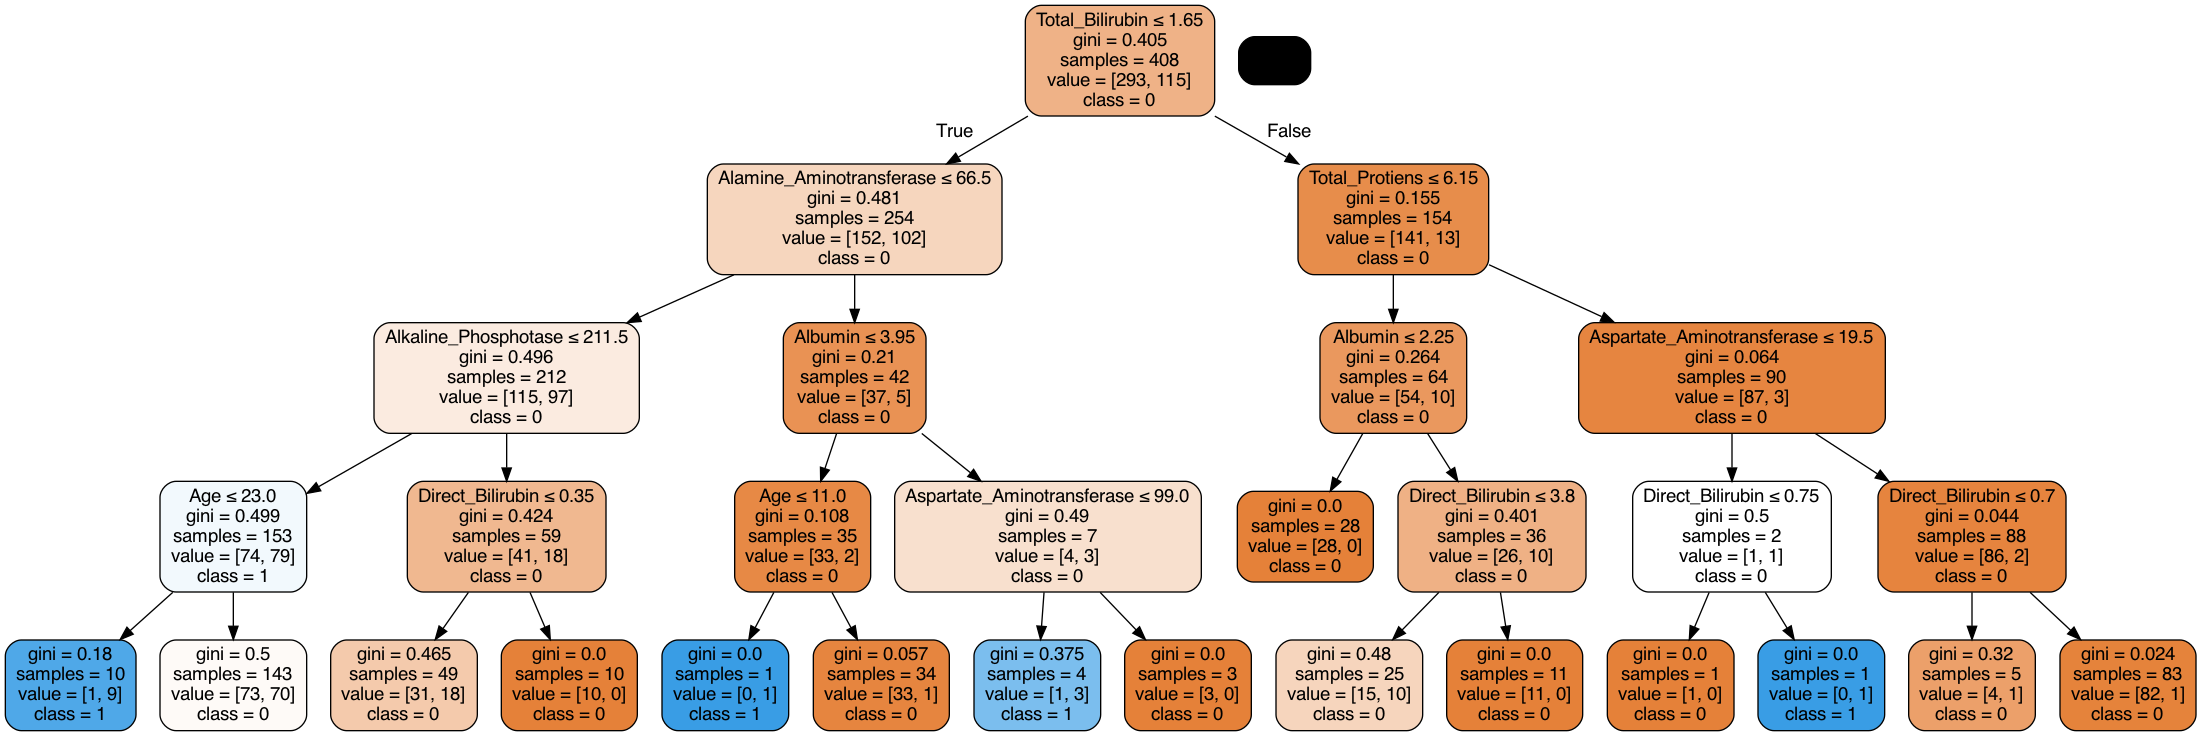

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = list(df)[0:9]
print(feature_cols)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('liver-disease.png')
Image(graph.create_png())

Let's see if you can do better with Random Forest.  Train and evaluate accuracy and confusion matrix.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
